In [300]:
#Import Data Manipulation Libraries
import numpy as np
import pandas as pd

#Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import warnings
import warnings
warnings.filterwarnings('ignore')

#Import Logging
import logging 
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log')


#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor


#importing matrix for regression model
from sklearn.metrics import r2_score,mean_absolute_error

In [301]:
df = pd.read_csv('market_pipe_thickness_loss_dataset.csv')
df.sample(frac = 1)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
719,300,15.03,Stainless Steel,ASTM A333 Grade 6,600,54.8,14.85,7.96,52.96,5,Critical
963,600,29.21,PVC,API 5L X65,900,1.6,14.94,5.67,19.41,3,Critical
819,250,9.86,HDPE,API 5L X65,600,68.4,7.98,6.94,70.39,17,Critical
525,1000,21.65,PVC,API 5L X42,600,45.9,14.74,0.80,3.70,23,Normal
130,150,7.94,Carbon Steel,API 5L X42,2500,57.2,10.79,4.92,61.96,15,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
63,1000,31.70,Carbon Steel,API 5L X52,600,38.8,0.09,4.10,12.93,11,Moderate
554,150,8.75,Fiberglass,ASTM A333 Grade 6,900,3.7,16.84,3.84,43.89,17,Moderate
653,300,12.36,Stainless Steel,API 5L X65,1500,10.2,1.58,2.06,16.67,4,Moderate
801,250,11.93,Stainless Steel,ASTM A333 Grade 6,900,-1.5,13.99,9.05,75.86,1,Critical


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [303]:
numerical_col = df.select_dtypes(exclude = 'object')
numerical_col

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
0,800,15.48,300,84.9,16.04,4.91,31.72,2
1,800,22.00,150,14.1,7.38,7.32,33.27,4
2,400,12.05,2500,0.6,2.12,6.32,52.45,7
3,1500,38.72,1500,52.7,5.58,6.20,16.01,19
4,1500,24.32,1500,11.7,12.29,8.58,35.28,20
...,...,...,...,...,...,...,...,...
995,1500,34.85,150,96.2,5.16,9.98,28.64,15
996,800,12.53,150,6.5,6.54,1.07,8.54,23
997,100,6.77,600,44.7,15.90,6.22,91.88,15
998,300,15.05,600,37.9,6.60,5.39,35.81,12


In [304]:
categorical_col = df.select_dtypes(include = 'object')
categorical_col

,Material,Grade,Condition
0,Carbon Steel,ASTM A333 Grade 6,Moderate
1,PVC,ASTM A106 Grade B,Critical
2,Carbon Steel,API 5L X52,Critical
3,Carbon Steel,API 5L X42,Critical
4,HDPE,API 5L X65,Critical
...,...,...,...
995,PVC,API 5L X65,Critical
996,Carbon Steel,ASTM A333 Grade 6,Normal
997,PVC,ASTM A106 Grade B,Critical
998,HDPE,API 5L X42,Critical


In [305]:
from collections import OrderedDict

stats=[]
for col in numerical_col.columns:
  numerical_stats = OrderedDict({
      'feature':col,
      'mean':df[col].mean(),
      'median':df[col].quantile(0.50),
      'mode':df[col].mode()[0],
      'min':df[col].min(),
      'max':df[col].max(),
      'std':df[col].std(),
      'var':df[col].var(),
      'skew':df[col].skew(),
      'kurt':df[col].kurtosis(),
      'iqr':df[col].quantile(0.75)-df[col].quantile(0.25),
      'q1': df[col].quantile(0.25),
      'q3': df[col].quantile(0.75),
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report



,feature,mean,median,mode,min,max,std,var,skew,kurt,iqr,q1,q3
0,Pipe_Size_mm,522.00000,300.000,100.00,50.00,1500.00,443.703587,196872.872873,0.909715,-0.385009,650.0000,150.0000,800.0000
1,Thickness_mm,16.07353,12.930,5.10,3.00,49.53,10.548358,111.267854,0.933389,0.104414,15.6700,7.3575,23.0275
2,Max_Pressure_psi,1004.10000,900.000,2500.00,150.00,2500.00,812.843099,660713.903904,0.803780,-0.668937,1200.0000,300.0000,1500.0000
3,Temperature_C,42.59560,41.200,13.40,-50.00,149.70,41.127071,1691.435977,0.269018,-0.258605,55.7500,13.4000,69.1500
4,Corrosion_Impact_Percent,9.74599,9.720,3.04,0.00,20.00,5.817492,33.843208,0.054038,-1.231404,10.3400,4.4925,14.8325
5,Thickness_Loss_mm,4.88630,4.915,7.41,0.01,9.99,2.901123,8.416512,-0.008056,-1.217228,5.0675,2.3650,7.4325
6,Material_Loss_Percent,46.74756,31.660,0.73,0.08,318.75,46.602553,2171.797961,1.943946,4.648783,45.3700,15.6650,61.0350
7,Time_Years,12.96100,13.000,2.00,1.00,25.00,7.135993,50.922401,-0.022498,-1.183413,12.0000,7.0000,19.0000


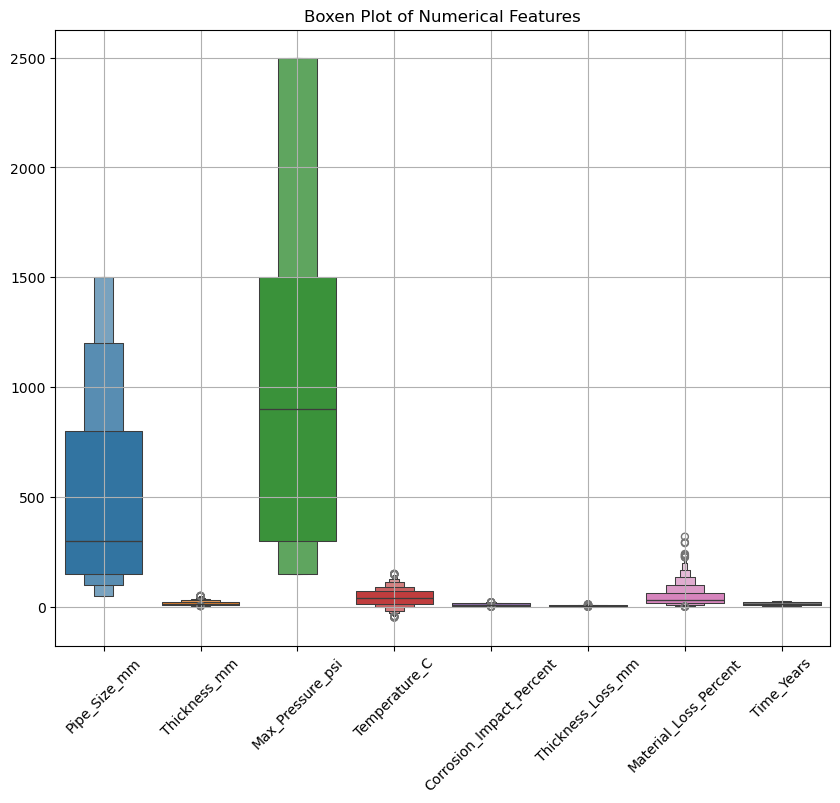

In [306]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 8))
sns.boxenplot(data= df)

plt.xticks(rotation = 45)  
plt.title("Boxen Plot of Numerical Features")
plt.grid()
plt.show()

In [307]:
# Replace Outliers with Median Statergy

for col in numerical_col.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'Pipe_Size_mm'.
Replaced 11 outliers in 'Thickness_mm' with median.
No outliers found in 'Max_Pressure_psi'.
No outliers found in 'Temperature_C'.
No outliers found in 'Corrosion_Impact_Percent'.
No outliers found in 'Thickness_Loss_mm'.
Replaced 70 outliers in 'Material_Loss_Percent' with median.
No outliers found in 'Time_Years'.


In [308]:
df

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical
...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.85,PVC,API 5L X65,150,96.2,5.16,9.98,28.64,15,Critical
996,800,12.53,Carbon Steel,ASTM A333 Grade 6,150,6.5,6.54,1.07,8.54,23,Normal
997,100,6.77,PVC,ASTM A106 Grade B,600,44.7,15.90,6.22,91.88,15,Critical
998,300,15.05,HDPE,API 5L X42,600,37.9,6.60,5.39,35.81,12,Critical


In [309]:
df.columns

Index(['Pipe_Size_mm', 'Thickness_mm', 'Material', 'Grade', 'Max_Pressure_psi',
       'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm',
       'Material_Loss_Percent', 'Time_Years', 'Condition'],
      dtype='object')

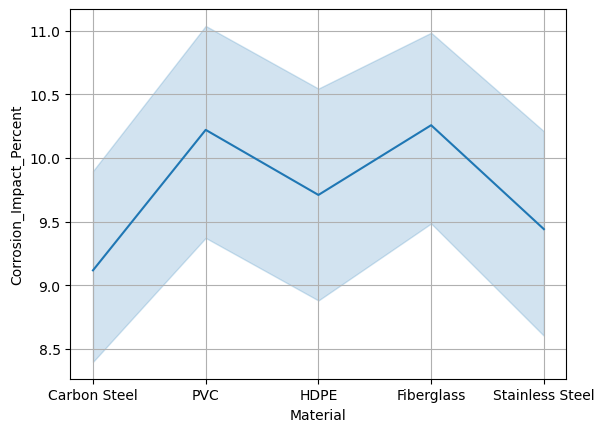

In [310]:
sns.lineplot(x = df['Material'], y = df['Corrosion_Impact_Percent'])
plt.grid()
plt.show()

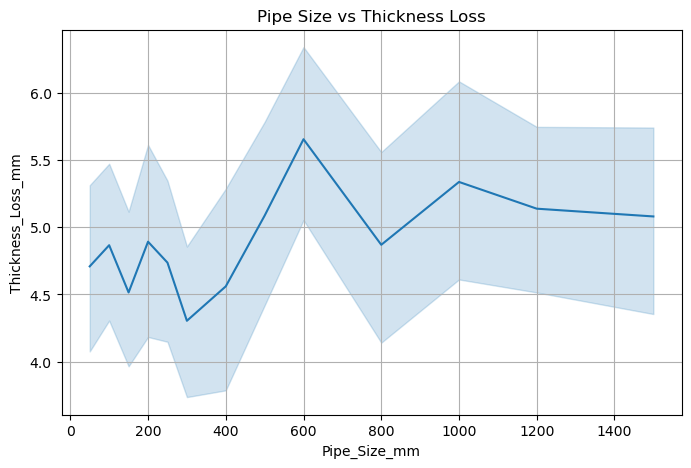

In [311]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Pipe_Size_mm', y='Thickness_Loss_mm', data=df)
plt.title("Pipe Size vs Thickness Loss")
plt.grid()
plt.show()


In [312]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])


In [313]:
df = df[[
    'Pipe_Size_mm', 'Thickness_mm', 'Material', 'Grade', 'Max_Pressure_psi',
       'Temperature_C', 'Corrosion_Impact_Percent',
       'Material_Loss_Percent', 'Time_Years', 'Condition','Thickness_Loss_mm'
]]

<Axes: >

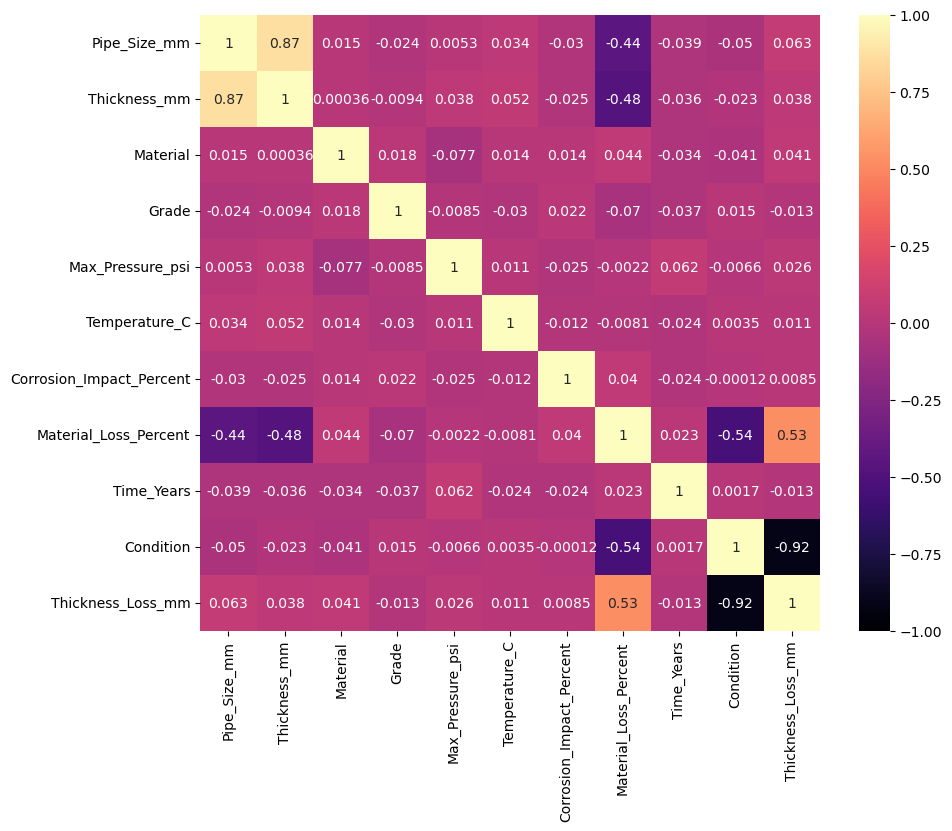

In [314]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, vmax=1,vmin=-1,center=0,cmap='magma')

In [315]:
df.columns

Index(['Pipe_Size_mm', 'Thickness_mm', 'Material', 'Grade', 'Max_Pressure_psi',
       'Temperature_C', 'Corrosion_Impact_Percent', 'Material_Loss_Percent',
       'Time_Years', 'Condition', 'Thickness_Loss_mm'],
      dtype='object')

In [316]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('Condition',axis = 1))

,features,VIF_Values
1,Thickness_mm,14.14
0,Pipe_Size_mm,10.21
9,Thickness_Loss_mm,6.44
7,Material_Loss_Percent,5.08
8,Time_Years,3.59
6,Corrosion_Impact_Percent,3.34
3,Grade,2.79
2,Material,2.66
4,Max_Pressure_psi,2.42
5,Temperature_C,1.99


In [317]:
#split Independent column and Target Column
X = df.drop(columns = ['Thickness_Loss_mm',],axis = 1)
y = df['Thickness_Loss_mm']

In [318]:
#split Train and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state= 42)

In [319]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [320]:
from sklearn.decomposition import PCA

# Try keeping 95% variance
pca = PCA(n_components=8) #if its 0-1 then taking variance, other than 1 is parameter
x_pca = pca.fit_transform(X_train)

print(f"Original shape: {X_train.shape}")
print(f"Transformed shape: {x_pca.shape}")  




Original shape: (800, 10)
Transformed shape: (800, 8)


In [321]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = Rf.predict(X_test)
print('Model Accuracy for: ',r2_score(y_test,y_pred_RF)*100)

Model Accuracy for:  96.17095092322077


In [322]:
import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor: ',r2_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost Regressor:  97.089176436755


In [323]:
from catboost import CatBoostRegressor

CBR = CatBoostRegressor().fit(X_train,y_train)
y_pred_cbr = CBR.predict(X_test)

print('Model Accuracy for Cat Neighbors Regressor:',r2_score(y_test,y_pred_cbr)*100)

Learning rate set to 0.039525
0:	learn: 2.7805032	total: 803us	remaining: 803ms
1:	learn: 2.6990958	total: 1.91ms	remaining: 951ms
2:	learn: 2.6233789	total: 2.95ms	remaining: 980ms
3:	learn: 2.5507714	total: 3.92ms	remaining: 975ms
4:	learn: 2.4764103	total: 4.89ms	remaining: 973ms
5:	learn: 2.4068157	total: 5.85ms	remaining: 969ms
6:	learn: 2.3343029	total: 6.37ms	remaining: 904ms
7:	learn: 2.2702445	total: 7.34ms	remaining: 910ms
8:	learn: 2.2105237	total: 8.33ms	remaining: 918ms
9:	learn: 2.1554113	total: 9.29ms	remaining: 920ms
10:	learn: 2.1014751	total: 10.2ms	remaining: 921ms
11:	learn: 2.0463628	total: 11.2ms	remaining: 923ms
12:	learn: 1.9939776	total: 12.2ms	remaining: 923ms
13:	learn: 1.9438773	total: 13.2ms	remaining: 927ms
14:	learn: 1.8989278	total: 14.2ms	remaining: 932ms
15:	learn: 1.8502649	total: 14.9ms	remaining: 913ms
16:	learn: 1.8059272	total: 15.8ms	remaining: 916ms
17:	learn: 1.7639640	total: 16.9ms	remaining: 920ms
18:	learn: 1.7263689	total: 17.9ms	remaining:

In [324]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

print('Model Accuracy for KNN Neighbors Regressor:',r2_score(y_test,y_pred_knn)*100)

Model Accuracy for KNN Neighbors Regressor: 80.20718730346562


In [325]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print('Model Accuracy for Linear Regression: ',r2_score(y_test,y_pred_LR)*100)

Model Accuracy for Linear Regression:  85.90229932470847
